## Develop Image Cartoonifier

Import the required modules

*  CV2: Imported to use OpenCV for image processing
    
*  Matplotlib: This library is used for visualization and plotting. Thus, it is imported to    form the plot of images.    

In [58]:
import cv2
import matplotlib.pyplot as plt

In [59]:
#path of image to be cartoonified.
image_path = "/home/user/Desktop/set 1/cartoonify images/hrx.jpg"



For a computer, everything is just numbers. Thus, in the below code, we will convert our image into a numpy array.

Imread is a method in cv2 which is used to store images in the form of numbers. This helps us to perform operations according to our needs. The image is read as a numpy array, in which cell values depict R, G, and B values of a pixel.

In [60]:
original_image = cv2.imread(image_path)

To convert an image to a cartoon, multiple transformations are done.

* first convert it into grayscale image.
* Then, the Grayscale image is smoothened, and we try to extract the edges in the image. 
* Finally, we form a color image and mask it with edges.
* Atlast we just blend the two images ,creates a beautiful cartoon image with edges 
  and lightened color of the original image.

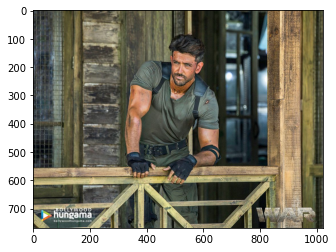

In [61]:
# we just showing the covertion of default bgr image to rgb using cvtcolor module
original_img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(original_img)

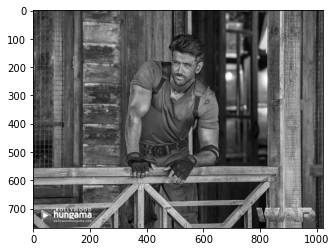

In [63]:
#creating grayscale image
gray_image = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image , cmap='gray')

After this, we will smoothen the edges in this image . 
This is done to identify the edges of object easily

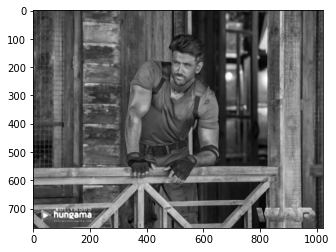

In [65]:
smooth_gray = cv2.medianBlur(gray_image, ksize=5) 
#Here ksize is the measure of smoothening the image.
plt.imshow(smooth_gray, cmap='gray')

The sharpness of image is reduced.

** Next ,We have to highlight the edges in the current image.  **

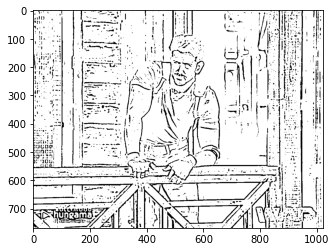

In [72]:
edge_get = cv2.adaptiveThreshold(smooth_gray, maxValue=255 ,adaptiveMethod= cv2.ADAPTIVE_THRESH_MEAN_C 
                                 ,thresholdType=cv2.THRESH_BINARY , blockSize=9 , C=9)
plt.imshow(edge_get , cmap="gray")

** Then we apply bilateral filter to remove noise from the image.
   it will also make the edges sharp. **
   
   

we are applying bilateral filter on original image , this is to combine with above image.

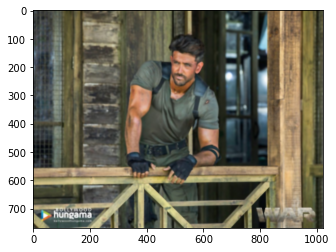

In [95]:
color_image = cv2.bilateralFilter(original_img, sigmaColor=300 , sigmaSpace=300 , d=9)
plt.imshow(color_image ,cmap='gray')

Use edged image as a mask on the color image.   bitwise_and()is used here.
bitwise_and simply combines two arrays ,here arrays of two images.

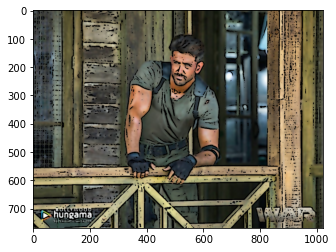

In [96]:
cartoon_img = cv2.bitwise_and(src1 =color_image, src2=color_image , mask=edge_get)
plt.imshow(cartoon_img, cmap ='gray')

In [97]:
#END